# Research Question

Given a patient's medical history, can we predict whether or not they have heart disease?

# Data Collection and Cleaning

### Fetching Data
- Requires API key in the header
- Seemed to only allow fetching 10k rows at a time
- API returned `{ nextPageToken }`
- Keep fetching more data until no more next page

### Issues:
- random rows with all `null` values -> remove them
- missing fields in the JSON -> replace with 0
- null values in the JSON -> replace with 0
- some cells have ~ in them -> remove that
- some cells have the number in quotes -> remove quotes

### Original Features:
- `id`: Unique identifier for each record
- `age`: Age in days
- `gender`: Gender of the individual (1 for male, 2 for female)
- `height`: Height in centimeters
- `weight`: Weight in kilograms
- `ap_hi`: Systolic blood pressure
- `ap_lo`: Diastolic blood pressure
- `cholesterol`: Cholesterol levels (1 for normal, 2 for above normal, 3 for well above normal)
- `gluc`: Glucose levels (1 for normal, 2 for above normal, 3 for well above normal)
- `smoke`: Smoking status (1 if the individual smokes, 0 otherwise)
- `alco`: Alcohol intake (1 if the individual drinks alcohol, 0 otherwise)
- `active`: Physical activity (1 if the individual is active, 0 otherwise)
- `cardio`: Presence of cardiovascular disease (1 if the individual has the disease, 0 otherwise)

![image](test.png)

# Data Exploration

### Adding New Features

In our dataset, we enhanced the feature set by creaing new columns derived from existing ones. 

Some of the new features are:

- `bp_category`: Blood pressure category based on ap_hi and ap_lo
- `gluc_category`: Glucose level category based on gluc
- `chlor_category`: Cholesterol level category based on cholesterol
- `age_years`: Age in years (converted from days)
- `BMI`: Body Mass Index, calculated from height and weight
- `bmi_category`: BMI category (e.g., underweight, normal weight, overweight, obese)
- `pulse_pressure`: Difference between systolic and diastolic blood pressure
- `lifestyle_score`: A score representing a combination of smoking, alcohol intake, and physical activity

After creating these features, we found that:

## 1. Blood Pressure Categories:
- Most people have normal and elevated blood pressure
- High blood pressure stages indicate a higher risk of cardiovascular disease

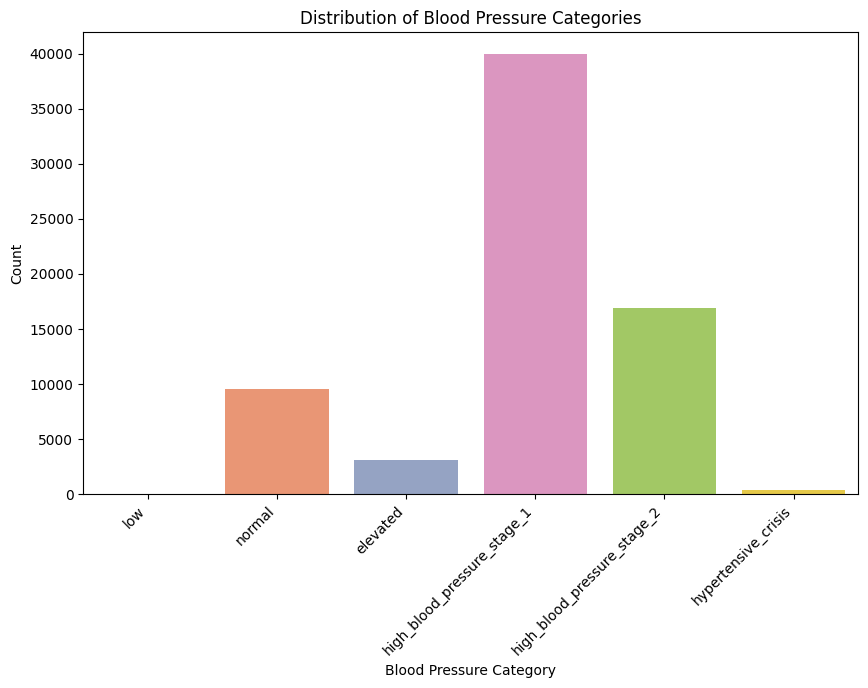

## 2. BMI and BMI categories:
- A significant portion of the population is normal weight, overweight, and obese. 
- BMI distribution helps understand weight related health risks and how people treat their bodies. 

![image-2.png](BMI_distribution.png)
![image-2.png](BMI_categories.png)

## 3. Lifestyle Score:
calculated by: 

$(1 - \text{if patient smokes}) + (1 - \text{if patient drinks alcohol}) + \text{if patient is active}$

- Higher scores indicate a healthier lifestyle
- Correlates negatively with smoking and alcohol intake, but positively with physical activity
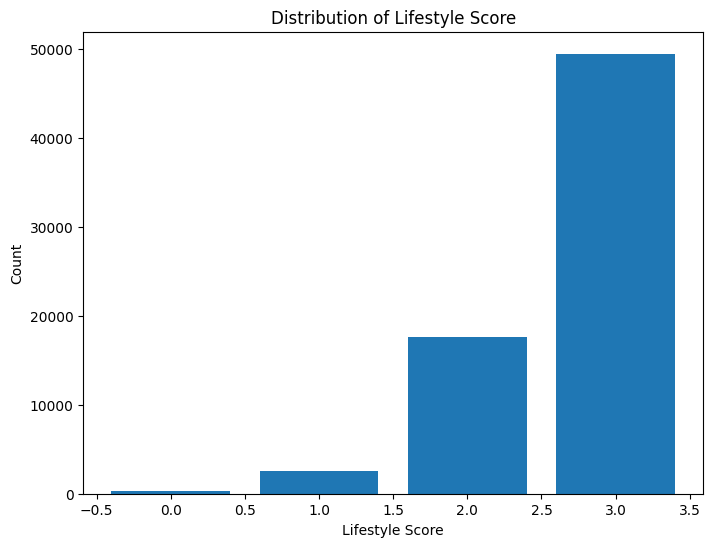


Overall, these new features provide a more comprehensive view of the dataset and help us understand the relationships between different variables. 

We can use these new features to build better predictive models to gain insights into cardiovascular disease risk factors.


# Machine Learning

### Splitting the Data
- Split the data into training and testing sets

### Cross Validation
- Used cross-validation to evaluate model performance on subsets of the data. 
- This avoids overfitting and provides a more accurate estimate of performance. 

### Grid Search Hyperparameter Tuning
- Used grid search to find the best hyperparameters for the models.

### Models Considered
- Logistic Regression
- Random Forest
- Gradient Boosting
- K-Nearest Neighbors

### Model Evaluation
- Overall, we found that Random Forest performed the best with an accuracy of 0.72.

We used the following features in the model:

- 'height', 'weight', 'ap_hi', 'ap_lo', 'age', 'BMI', 'pulse_pressure'

# Analysis


### Distribution of Ages
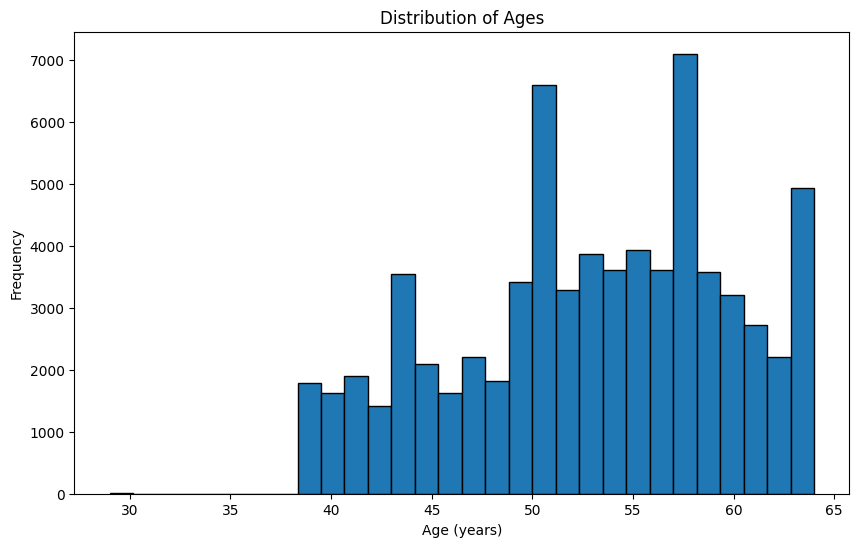

- The dataset is focused on the age group of 40-65 years old. 
- This is likely because cardiovascular diseases are more common in older individuals.

### Correlation Heatmap
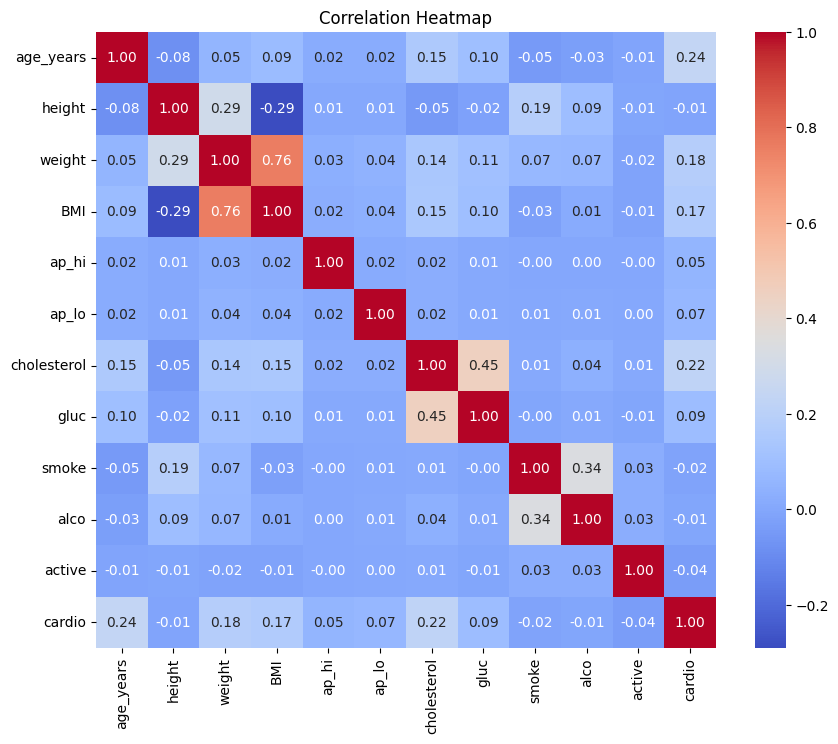

- We can see that BMI, cholestral, gluclose, smoking, and alcohol intake are the most correlated with cardiovascular disease.
- This is consistent with what we know about risk factors for cardiovascular disease.
- In addition, that is pretty consistent with the feature set we have trained our model on. 